In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
df=pd.read_csv('3D_spatial_network.txt',header=None)
df.columns=['google_Coordinates','longitude','latitude','altitude']
df.head()

,google_Coordinates,longitude,latitude,altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [2]:
df.shape

(434874, 4)

In [3]:
df=df.drop(['google_Coordinates','altitude'],axis=1)
df.head()

,longitude,latitude
0,9.349849,56.740876
1,9.350188,56.740679
2,9.350549,56.740544
3,9.350806,56.740484
4,9.351053,56.740486


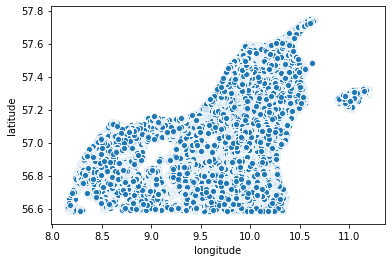

In [4]:
sns.scatterplot(x='longitude',y='latitude',data=df)

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
X.head()

,longitude,latitude
0,-0.608893,-1.184482
1,-0.608351,-1.185163
2,-0.607777,-1.185626
3,-0.607367,-1.185833
4,-0.606972,-1.185827


In [6]:
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=4)
cluster.fit(X)
# from yellowbrick.cluster import KElbowVisualizer
# vis = KElbowVisualizer(cluster,k=(2,10))
# vis.fit(X)
# vis.show()

KMeans(n_clusters=4)

In [7]:
X['pred_label']=cluster.labels_
X.head()

,longitude,latitude,pred_label
0,-0.608893,-1.184482,1
1,-0.608351,-1.185163,1
2,-0.607777,-1.185626,1
3,-0.607367,-1.185833,1
4,-0.606972,-1.185827,1


In [8]:
X['pred_label'].value_counts()

3    133641
2    123059
0     98563
1     79611
Name: pred_label, dtype: int64

In [ ]:
sns.scatterplot(x='longitude',y='latitude',data=X,hue='pred_label')